In [309]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Input
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow.keras.initializers
import tensorflow.keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 200
import random
import math
from datetime import datetime
random.seed()

In [322]:
array_len = 10000
x = np.random.sample(array_len)
x = x*10 - 5
y = np.empty(array_len)

# discontinuous function:
#for i in range(array_len):
#    if (x[i] < 0.5):
#        y[i] = 0
#    elif (x[i] < 1000):
#        y[i] = 1
#    else:
#         y[i] =0

# Cubic function:
y = 0.25*(x**3) + 0.75*(x**2) - 1.5*x - 2
print ("Done.")

Done.


In [323]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.15)
print("Done.")

Done.


In [324]:
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(1,)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer=Adam(lr=0.001), loss='mean_absolute_error')
model.fit(X_train, Y_train, epochs=300, validation_split=0.2, batch_size=100)

Train on 6800 samples, validate on 1700 samples
Epoch 1/300
6800/6800 [==============================] - 0s 69us/sample - loss: 5.6694 - val_loss: 5.4963
Epoch 2/300
6800/6800 [==============================] - 0s 13us/sample - loss: 5.4478 - val_loss: 5.2627
Epoch 3/300
6800/6800 [==============================] - 0s 19us/sample - loss: 5.2055 - val_loss: 5.0138
Epoch 4/300
6800/6800 [==============================] - 0s 20us/sample - loss: 4.9564 - val_loss: 4.7580
Epoch 5/300
6800/6800 [==============================] - 0s 18us/sample - loss: 4.7059 - val_loss: 4.5066
Epoch 6/300
6800/6800 [==============================] - 0s 14us/sample - loss: 4.4553 - val_loss: 4.2673
Epoch 7/300
6800/6800 [==============================] - 0s 15us/sample - loss: 4.2258 - val_loss: 4.0505
Epoch 8/300
6800/6800 [==============================] - 0s 12us/sample - loss: 4.0169 - val_loss: 3.8576
Epoch 9/300
6800/6800 [==============================] - 0s 15us/sample - loss: 3.8298 - val_loss: 3.682

6800/6800 [==============================] - 0s 12us/sample - loss: 0.0846 - val_loss: 0.0866
Epoch 78/300
6800/6800 [==============================] - 0s 12us/sample - loss: 0.0829 - val_loss: 0.0869
Epoch 79/300
6800/6800 [==============================] - 0s 11us/sample - loss: 0.0796 - val_loss: 0.0808
Epoch 80/300
6800/6800 [==============================] - 0s 11us/sample - loss: 0.0787 - val_loss: 0.0804
Epoch 81/300
6800/6800 [==============================] - 0s 11us/sample - loss: 0.0755 - val_loss: 0.0768
Epoch 82/300
6800/6800 [==============================] - 0s 12us/sample - loss: 0.0735 - val_loss: 0.0748
Epoch 83/300
6800/6800 [==============================] - 0s 16us/sample - loss: 0.0731 - val_loss: 0.0773
Epoch 84/300
6800/6800 [==============================] - 0s 11us/sample - loss: 0.0709 - val_loss: 0.0717
Epoch 85/300
6800/6800 [==============================] - 0s 13us/sample - loss: 0.0698 - val_loss: 0.0706
Epoch 86/300
6800/6800 [==========================

6800/6800 [==============================] - 0s 21us/sample - loss: 0.0396 - val_loss: 0.0402
Epoch 154/300
6800/6800 [==============================] - 0s 16us/sample - loss: 0.0398 - val_loss: 0.0401
Epoch 155/300
6800/6800 [==============================] - 0s 13us/sample - loss: 0.0402 - val_loss: 0.0417
Epoch 156/300
6800/6800 [==============================] - 0s 14us/sample - loss: 0.0399 - val_loss: 0.0406
Epoch 157/300
6800/6800 [==============================] - 0s 12us/sample - loss: 0.0421 - val_loss: 0.0449
Epoch 158/300
6800/6800 [==============================] - 0s 21us/sample - loss: 0.0396 - val_loss: 0.0423
Epoch 159/300
6800/6800 [==============================] - 0s 19us/sample - loss: 0.0401 - val_loss: 0.0395
Epoch 160/300
6800/6800 [==============================] - 0s 16us/sample - loss: 0.0411 - val_loss: 0.0407
Epoch 161/300
6800/6800 [==============================] - 0s 22us/sample - loss: 0.0387 - val_loss: 0.0405
Epoch 162/300
6800/6800 [=================

Epoch 229/300
6800/6800 [==============================] - 0s 16us/sample - loss: 0.0382 - val_loss: 0.0413
Epoch 230/300
6800/6800 [==============================] - 0s 12us/sample - loss: 0.0382 - val_loss: 0.0395
Epoch 231/300
6800/6800 [==============================] - 0s 11us/sample - loss: 0.0389 - val_loss: 0.0383
Epoch 232/300
6800/6800 [==============================] - 0s 11us/sample - loss: 0.0379 - val_loss: 0.0380
Epoch 233/300
6800/6800 [==============================] - 0s 12us/sample - loss: 0.0375 - val_loss: 0.0396
Epoch 234/300
6800/6800 [==============================] - 0s 11us/sample - loss: 0.0400 - val_loss: 0.0417
Epoch 235/300
6800/6800 [==============================] - 0s 11us/sample - loss: 0.0382 - val_loss: 0.0384
Epoch 236/300
6800/6800 [==============================] - 0s 11us/sample - loss: 0.0375 - val_loss: 0.0382
Epoch 237/300
6800/6800 [==============================] - 0s 11us/sample - loss: 0.0379 - val_loss: 0.0385
Epoch 238/300
6800/6800 [===

In [325]:
Y_predict = model.predict(X_test)
model.evaluate(X_test, Y_test)

1500/1500 [==============================] - 0s 29us/sample - loss: 0.0366


0.03656148874759674

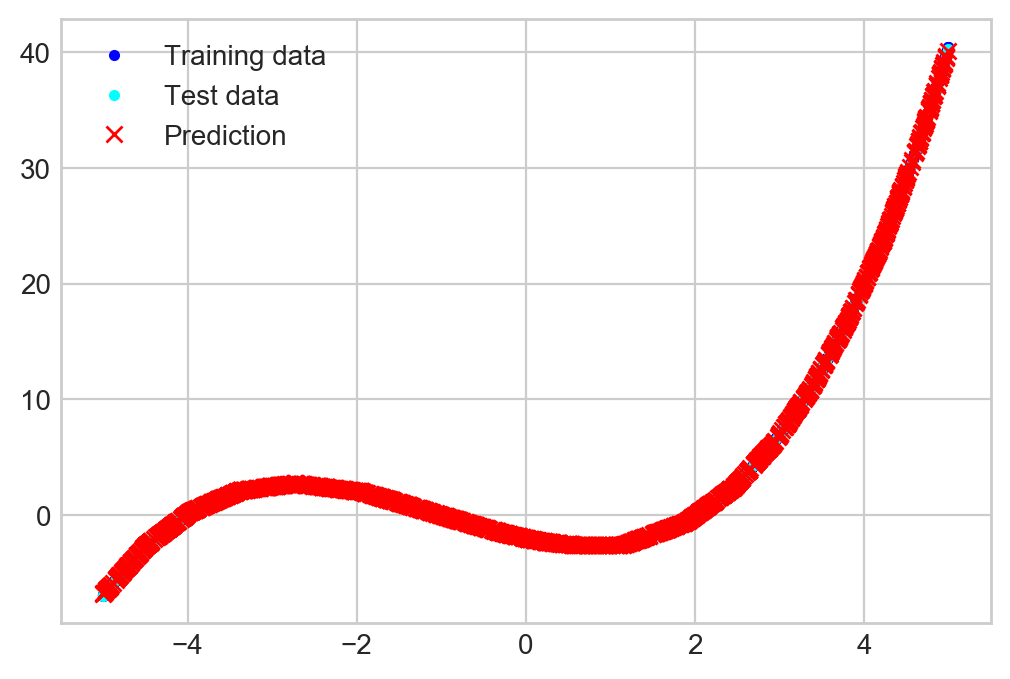

In [326]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 200
plt.plot(X_train, Y_train, linestyle='none', marker='.', color='blue', label='Training data')
plt.plot(X_test, Y_test, linestyle='none', marker='.', color='cyan', label='Test data')
plt.plot(X_test, Y_predict, linestyle='none', marker='x', color='red', label='Prediction')
plt.legend(loc='upper left')
plt.show()

In [327]:
print(model.get_weights())

[array([[-0.5571378 , -0.46681195, -0.29426372, -0.5103452 ,  0.9384339 ,
         0.96530074,  0.7682027 ,  1.2196637 , -0.614374  , -0.626328  ,
        -0.8171848 ,  0.91062665,  0.62027913, -0.7041336 ,  1.5379007 ,
        -0.5325173 , -0.7938329 ,  0.8191767 , -0.6665626 , -0.53906465]],
      dtype=float32), array([-1.9765964e-03,  2.5791112e-01,  1.7279844e-01,  2.0455448e-01,
       -2.7663531e+00, -2.3644035e+00, -3.2480438e+00, -2.3031151e+00,
       -2.4372871e+00, -2.9890409e-01, -2.2364664e+00, -3.4709444e+00,
       -2.8715444e+00, -1.3599887e+00, -1.7823831e+00,  1.1551790e-01,
       -2.1468247e-01, -2.7723775e+00, -2.2603564e+00, -2.4165006e+00],
      dtype=float32), array([[ 0.718183  ],
       [ 0.75064594],
       [ 0.81997734],
       [ 0.7318714 ],
       [ 2.9523594 ],
       [ 2.7711656 ],
       [ 4.230976  ],
       [ 2.2275438 ],
       [-3.898919  ],
       [ 0.30772623],
       [-2.2851617 ],
       [ 3.3742058 ],
       [ 4.9245186 ],
       [-1.7985154 

In [328]:
#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

def normalized_sigmoid_fkt(a, b, x):
   '''
   Returns array of a horizontal mirrored normalized sigmoid function
   output between 0 and 1
   Function parameters a = center; b = width
   '''
   s= 1/(1+np.exp(b*(x-a)))
   return 1*(s-min(s))/(max(s)-min(s)) # normalize function to 0-1

def logistic(x, minimum, maximum, slope, ec50):
    return maximum + (minimum-maximum)/(1 + (x/ec50)**slope)

In [337]:
array_len = 10000
range_width = 1000
x2 = np.random.random_sample((array_len,))

ec501 = 0.75
slope1 = -20
minimum1 = 0
maximum1 = 1

ec502 = 0.25
slope2 = 10
minimum2 = 0
maximum2 = 1
y2 = np.empty(array_len)

for i in range(array_len):
    #y2[i] =logistic(x2[i], minimum, maximum, slope, ec50)
    y2[i] = logistic(x2[i], minimum1, maximum1, slope1, ec501) + logistic(x2[i], minimum2, maximum2, slope2, ec502) -1        
print ("Done.")

Done.


In [338]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x2, y2, test_size=0.15)
print("Done.")

Done.


In [344]:
model2 = Sequential()
model2.add(Dense(2, activation='sigmoid', input_shape=(1,)))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error')
model2.fit(X_train2, Y_train2, validation_split = 0.2, batch_size=100, epochs=300)
# Note: this does not converge 100% of the time. may have to run more than once

Train on 6800 samples, validate on 1700 samples
Epoch 1/300
6800/6800 [==============================] - 0s 73us/sample - loss: 0.1877 - val_loss: 0.1883
Epoch 2/300
6800/6800 [==============================] - 0s 13us/sample - loss: 0.1873 - val_loss: 0.1881
Epoch 3/300
6800/6800 [==============================] - 0s 12us/sample - loss: 0.1873 - val_loss: 0.1881
Epoch 4/300
6800/6800 [==============================] - 0s 13us/sample - loss: 0.1871 - val_loss: 0.1882
Epoch 5/300
6800/6800 [==============================] - 0s 12us/sample - loss: 0.1870 - val_loss: 0.1879
Epoch 6/300
6800/6800 [==============================] - 0s 12us/sample - loss: 0.1868 - val_loss: 0.1876
Epoch 7/300
6800/6800 [==============================] - 0s 11us/sample - loss: 0.1862 - val_loss: 0.1872
Epoch 8/300
6800/6800 [==============================] - 0s 11us/sample - loss: 0.1849 - val_loss: 0.1861
Epoch 9/300
6800/6800 [==============================] - 0s 11us/sample - loss: 0.1821 - val_loss: 0.181

6800/6800 [==============================] - 0s 13us/sample - loss: 1.1970e-04 - val_loss: 1.2390e-04
Epoch 75/300
6800/6800 [==============================] - 0s 10us/sample - loss: 1.1836e-04 - val_loss: 1.2330e-04
Epoch 76/300
6800/6800 [==============================] - 0s 11us/sample - loss: 1.1767e-04 - val_loss: 1.2295e-04
Epoch 77/300
6800/6800 [==============================] - 0s 11us/sample - loss: 1.1704e-04 - val_loss: 1.1990e-04
Epoch 78/300
6800/6800 [==============================] - 0s 11us/sample - loss: 1.1572e-04 - val_loss: 1.1987e-04
Epoch 79/300
6800/6800 [==============================] - 0s 11us/sample - loss: 1.1460e-04 - val_loss: 1.1776e-04
Epoch 80/300
6800/6800 [==============================] - 0s 10us/sample - loss: 1.1408e-04 - val_loss: 1.1722e-04
Epoch 81/300
6800/6800 [==============================] - 0s 10us/sample - loss: 1.1418e-04 - val_loss: 1.1706e-04
Epoch 82/300
6800/6800 [==============================] - 0s 11us/sample - loss: 1.1392e-04 -

Epoch 145/300
6800/6800 [==============================] - 0s 13us/sample - loss: 9.0915e-05 - val_loss: 9.0593e-05
Epoch 146/300
6800/6800 [==============================] - 0s 11us/sample - loss: 8.9143e-05 - val_loss: 9.1411e-05
Epoch 147/300
6800/6800 [==============================] - 0s 12us/sample - loss: 8.9363e-05 - val_loss: 9.7113e-05
Epoch 148/300
6800/6800 [==============================] - 0s 11us/sample - loss: 8.9729e-05 - val_loss: 8.9443e-05
Epoch 149/300
6800/6800 [==============================] - 0s 12us/sample - loss: 8.8797e-05 - val_loss: 9.1114e-05
Epoch 150/300
6800/6800 [==============================] - 0s 12us/sample - loss: 8.7922e-05 - val_loss: 8.8994e-05
Epoch 151/300
6800/6800 [==============================] - 0s 12us/sample - loss: 9.1067e-05 - val_loss: 9.2387e-05
Epoch 152/300
6800/6800 [==============================] - 0s 11us/sample - loss: 8.9026e-05 - val_loss: 1.0100e-04
Epoch 153/300
6800/6800 [==============================] - 0s 11us/sampl

6800/6800 [==============================] - 0s 13us/sample - loss: 6.9771e-05 - val_loss: 7.0487e-05
Epoch 216/300
6800/6800 [==============================] - 0s 11us/sample - loss: 7.0367e-05 - val_loss: 6.9512e-05
Epoch 217/300
6800/6800 [==============================] - 0s 12us/sample - loss: 6.9222e-05 - val_loss: 7.1112e-05
Epoch 218/300
6800/6800 [==============================] - 0s 13us/sample - loss: 6.9763e-05 - val_loss: 6.9242e-05
Epoch 219/300
6800/6800 [==============================] - 0s 13us/sample - loss: 7.0382e-05 - val_loss: 8.3774e-05
Epoch 220/300
6800/6800 [==============================] - 0s 13us/sample - loss: 7.0001e-05 - val_loss: 7.2765e-05
Epoch 221/300
6800/6800 [==============================] - 0s 12us/sample - loss: 6.8353e-05 - val_loss: 7.5634e-05
Epoch 222/300
6800/6800 [==============================] - 0s 21us/sample - loss: 6.9873e-05 - val_loss: 6.8160e-05
Epoch 223/300
6800/6800 [==============================] - 0s 20us/sample - loss: 6.95

Epoch 286/300
6800/6800 [==============================] - 0s 21us/sample - loss: 5.8516e-05 - val_loss: 5.8517e-05
Epoch 287/300
6800/6800 [==============================] - 0s 15us/sample - loss: 5.9073e-05 - val_loss: 6.6773e-05
Epoch 288/300
6800/6800 [==============================] - 0s 12us/sample - loss: 5.8833e-05 - val_loss: 5.7201e-05
Epoch 289/300
6800/6800 [==============================] - 0s 20us/sample - loss: 5.7105e-05 - val_loss: 5.7190e-05
Epoch 290/300
6800/6800 [==============================] - 0s 21us/sample - loss: 5.7436e-05 - val_loss: 6.3521e-05
Epoch 291/300
6800/6800 [==============================] - 0s 18us/sample - loss: 5.7728e-05 - val_loss: 5.8771e-05
Epoch 292/300
6800/6800 [==============================] - 0s 16us/sample - loss: 5.6678e-05 - val_loss: 5.7874e-05
Epoch 293/300
6800/6800 [==============================] - 0s 11us/sample - loss: 5.7061e-05 - val_loss: 5.7911e-05
Epoch 294/300
6800/6800 [==============================] - 0s 13us/sampl

In [340]:
Y_predict2 = model2.predict(X_test2)
model2.evaluate(X_test2, Y_test2)

1500/1500 [==============================] - 0s 15us/sample - loss: 5.9723e-05


5.972278612898663e-05

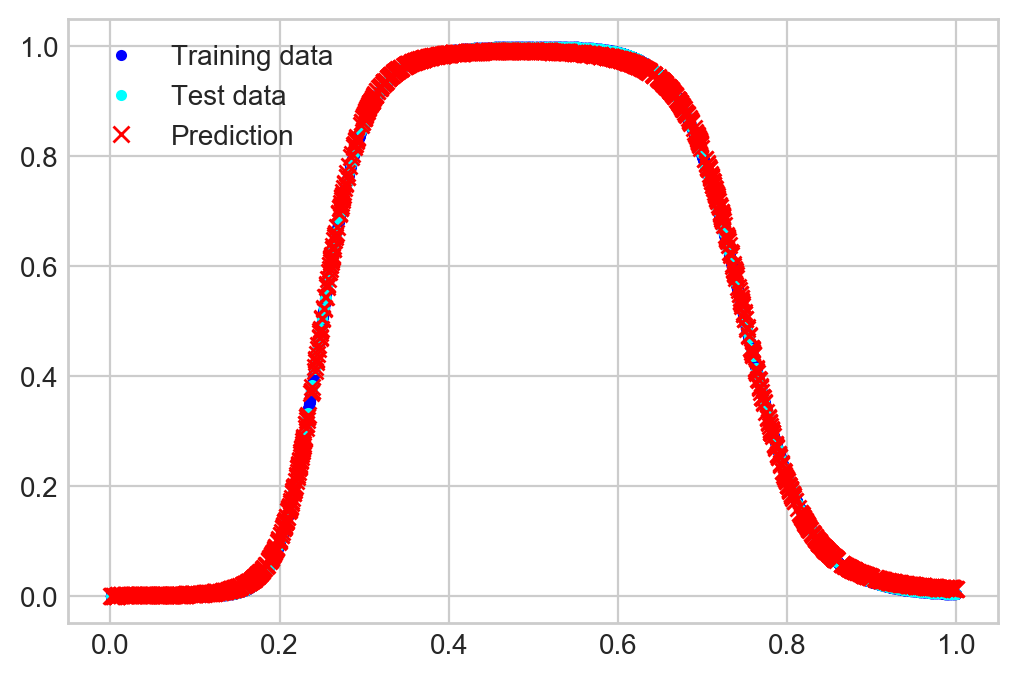

In [341]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 200
plt.plot(X_train2, Y_train2, linestyle='none', marker='.', color='blue', label='Training data')
plt.plot(X_test2, Y_test2, linestyle='none', marker='.', color='cyan', label='Test data')
plt.plot(X_test2, Y_predict2, linestyle='none', marker='x', color='red', label='Prediction')
plt.legend(loc='upper left')
plt.show()

In [342]:
for layer in model2.layers:
    print(layer.get_config())
    print(layer.get_weights())

{'name': 'dense_122', 'trainable': True, 'batch_input_shape': (None, 1), 'dtype': 'float32', 'units': 2, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
[array([[ 10.630562, -12.157975]], dtype=float32), array([-7.7933335,  2.6811028], dtype=float32)]
{'name': 'dense_123', 'trainable': True, 'dtype': 'float32', 'units': 1, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
[array([[-10.9390745],
       [-14.455868 ]], dtype=float32), array([6.0076756], dtyp